<a href="https://colab.research.google.com/github/gayza-cyber17/studying-Git/blob/main/Lection8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Библиотеки

In [27]:
import pandas as pd
import seaborn as sns
import scipy as scipy
import numpy as np
import matplotlib.pyplot as plt

### Домашнее задание по лекции 8

Вы получили долгожданный оффер в Яндекс и пытаетесь улучшить время доставки еды. Вы внедрили улучшение на тестовой группе и теперь время сравнить результаты тестовой и контрольной группы.

Дан датасет:
 - id заказа
- время доставки
- район доставки
- флаг (контрольная или тестовая группа)

Необходимо, понять:
1) **Стоит ли раскатывать** улучшение на всех пользователей?
2) **Улучшился ли результат** в тестовой группе? Статистически **значим ли** он?

In [28]:
import os
from google.colab import files


# Загружаем файл
uploaded = files.upload()

# Получаем имя загруженного файла
filename = list(uploaded.keys())[0]
print(f"Загружен файл: {filename}")

# Читаем CSV
df_data = pd.read_csv(filename)
print("Данные успешно загружены!")
print(df_data.head())

Saving Lection8.csv to Lection8 (3).csv
Загружен файл: Lection8 (3).csv
Данные успешно загружены!
   order_id  delivery_time  district experiment_group
0      3159             44  Purlieus          control
1     10426             51  Purlieus          control
2      9155             46  Purlieus          control
3     10699             34  Purlieus          control
4     10061             43  Purlieus          control


In [29]:
# смотрю на размер каждой группы
df_data.experiment_group.value_counts()

,count
experiment_group,
test,10104
control,10092


In [30]:
df_data.groupby('experiment_group')['delivery_time'].median()

,delivery_time
experiment_group,
control,45.0
test,39.0


In [31]:
df_data.groupby('experiment_group')['delivery_time'].mean()

,delivery_time
experiment_group,
control,45.065101
test,39.046813


Исходя из таких "сырых" данных видим, что и среднее время доставки и медиана находится на одном уровне, что говорит нам о нормальном распределении в данных. Видим, что в тестовой время доставки снизилось, но будем проверять.

In [32]:
group_a = df_data[df_data['experiment_group'] == 'control']['delivery_time']
group_b = df_data[df_data['experiment_group'] == 'test']['delivery_time']

Text(0.5, 1.0, 'Распределение времени доставки по группам')

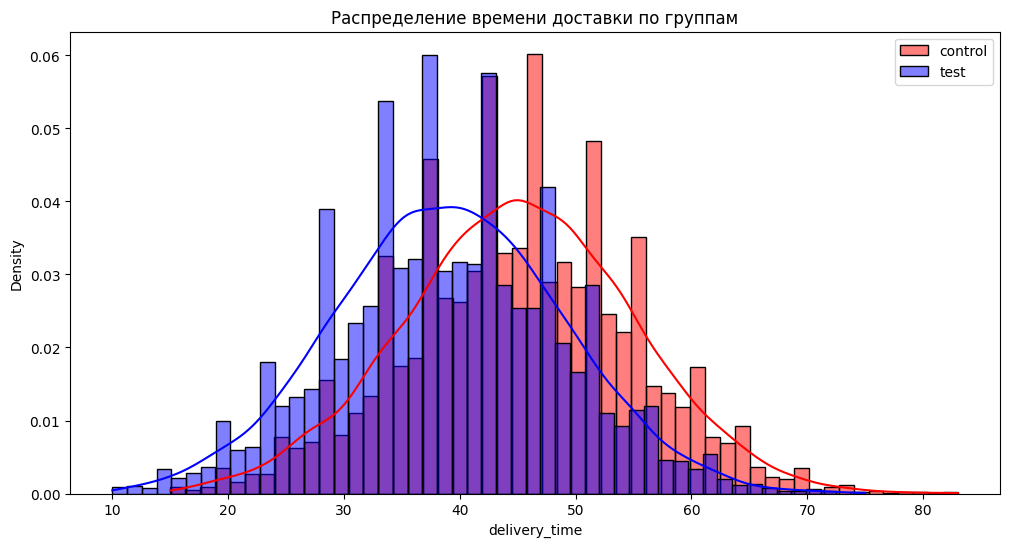

In [33]:
from scipy.stats import ttest_ind

plt.figure(figsize=(12,6))
sns.histplot(group_a, color='red', label='control', kde=True, stat='density')
sns.histplot(group_b, color='blue', label='test', kde=True, stat='density')
plt.legend()
plt.title('Распределение времени доставки по группам')



In [34]:
# проводим t-test
t_stat, p_value = ttest_ind(group_a, group_b)

In [35]:
alpha = 0.05

if alpha > p_value:
  print('Результат является статистически значимым.')
  print('Расскатываем новую фичу.')
else:
  print('Результат не является стат.значимым.')
  print('Оставляем все без изменений.')

Результат является статистически значимым.
Расскатываем новую фичу.


In [ ]:
Р

In [ ]:
Е

In [ ]:
Ш

In [ ]:
Е

In [ ]:
Н

In [ ]:
И